# 誤差逆伝播法

[バックプロパゲーション,Backpropagation](https://ja.wikipedia.org/wiki/%E3%83%90%E3%83%83%E3%82%AF%E3%83%97%E3%83%AD%E3%83%91%E3%82%B2%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3)のこと。ニューロン単位で損失関数計算し「局所誤差」を求め、ニューロンに対する入力の内、より大きな重みで接続された前段のニューロンに対して、局所誤差の責任があると判定する。連鎖律により、層全体のニューロンに対する入力を集積させてその入力を呼び起こしたニューロンを特定し、重みの傾斜を再計算することで責任を逆伝播させる。

## 連鎖律

[連鎖律](https://ja.wikipedia.org/wiki/%E9%80%A3%E9%8E%96%E5%BE%8B)とは微分法において以下の性質が成り立つ式のこと。  合成関数の導関数の積が元の構成関数の導関数と等しくなる。 。
$ \frac{dz}{dx} = \frac{dz}{dt} \frac{dt}{dx} $

## 計算グラフに置ける誤差逆伝播

[誤差逆伝播法のための計算グラフまとめ](http://marumaru.tonkotsu.jp/%E8%AA%A4%E5%B7%AE%E9%80%86%E4%BC%9D%E6%92%AD%E6%B3%95%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E8%A8%88%E7%AE%97%E3%82%B0%E3%83%A9%E3%83%95%E3%81%BE%E3%81%A8%E3%82%81) より

### ドット積の逆伝播

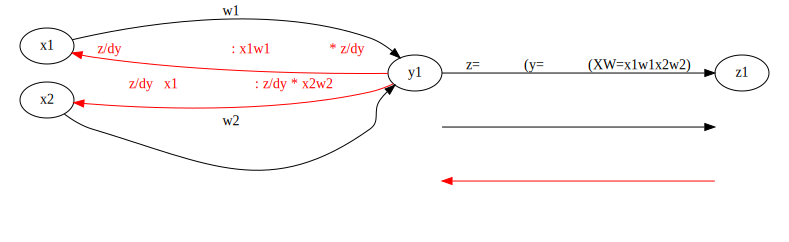

In [26]:
from graphviz import Digraph
dot = Digraph(comment="積の逆伝播")
dot.attr(rankdir="LR")
#dot.attr(splines="line") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="ドット積の逆伝播（単純に転置行列をしかるべき方向から掛け合わせて元の行列に戻すだけ）")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","x1")
        x.node("x2","x2")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y0","y0", color="white", fontcolor="white")
        y.node("y1","y1")
        y.node("y2","y2", color="white", fontcolor="white")
    dot.edge("x1", "y1", label="w1")
    dot.edge("x2",  "y1", label="w2")
    with main.subgraph(name="cluster_z") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z0","z0", color="white", fontcolor="white")
        z.node("z1","z1")
        z.node("z2","z2", color="white", fontcolor="white")
    main.edge("y0",  "z0", label="順伝播方向")
    main.edge("z2",  "y2", label="逆伝播方向", color="red", fontcolor="red")
    main.edge("y1",  "z1", label="z=活性関数(y=ドット積(XW=x1w1x2w2)")
    main.edge("y1",  "x1", label="z/dyにｘ２の重みを与える: x1w1の転置行列 * z/dy", color="red", fontcolor="red")
    main.edge("y1",  "x2", label="z/dyにx1の重みを与える: z/dy * x2w2の転置行列", color="red", fontcolor="red")

#print(dot)
dot

## 計算グラフの復習

### 以下のようなグラフで表されたもの

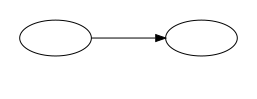

In [27]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="line") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","ノード")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y1","ノード")
    dot.edge("x1", "y1", label="エッジ")
#print(dot)
dot

### 問1. 太郎くんはスーパーで一個１００円のりんごを２個買いました。支払う金額を求めなさい。ただし、消費税が10%適用されるものとします。

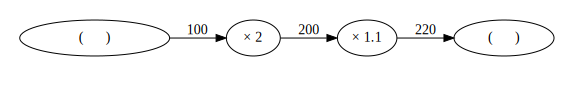

In [25]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="line") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="エッジを計算結果、ノードを計算式とした計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","りんご単価(入力)")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y1","× 2")
    with main.subgraph(name="cluster_y") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z1","× 1.1")    
    with main.subgraph(name="cluster_y") as out:
        out.attr(label="")
        out.attr(color="white")
        out.node("out1","金額(出力)")
    dot.edge("x1", "y1", label="100")
    dot.edge("y1", "z1", label="200")
    dot.edge("z1", "out1", label="220")
#print(dot)
dot

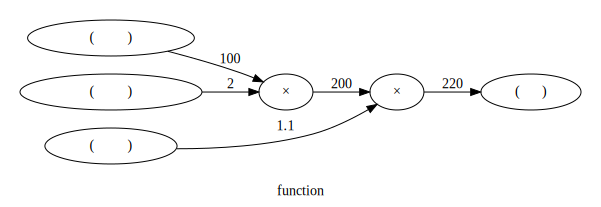

In [26]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="ノードをfunctionとした計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","りんご単価(スカラ)")
        x.node("x2","リンゴの個数(スカラ)")
        x.node("x3","消費税(スカラ)")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y1","×")
    with main.subgraph(name="cluster_y") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z1","×")    
    with main.subgraph(name="cluster_y") as out:
        out.attr(label="")
        out.attr(color="white")
        out.node("out1","金額(出力)")
    dot.edge("x1", "y1", label="100")
    dot.edge("x2", "y1", label="2")
    dot.edge("x3", "z1", label="1.1")
    dot.edge("y1", "z1", label="200")
    dot.edge("z1", "out1", label="220")
#print(dot)
dot

### 問2. 太郎くんはスーパーで一個１００円のりんごを２個、1個150円のみかんを3個買いました。支払う金額を求めなさい。ただし、消費税が10%適用されるものとします。

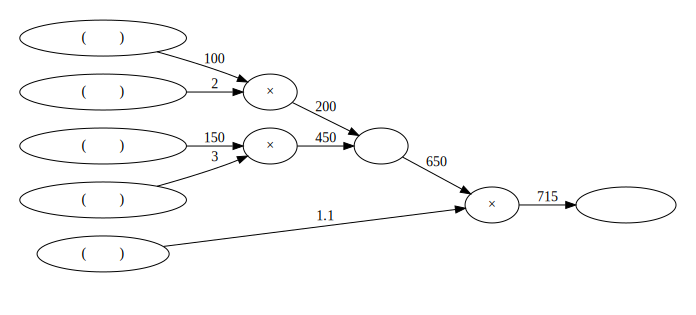

In [27]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="積算ノードと加算ノードをあわせた計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","リンゴ単価(スカラ)")
        x.node("x2","リンゴ個数(スカラ)")
        x.node("x3","みかん単価(スカラ)")
        x.node("x4","みかん個数(スカラ)")
        x.node("x5","消費税(スカラ)")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y1","×")
        y.node("y2","×")
    with main.subgraph(name="cluster_z") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z1","＋")
    with main.subgraph(name="cluster_a") as a:
        a.attr(label="")
        a.attr(color="white")
        a.node("a1","×")
    with main.subgraph(name="cluster_out") as out:
        out.attr(label="")
        out.attr(color="white")
        out.node("out1","金額（出力）")
    dot.edge("x1", "y1", label="100")
    dot.edge("x2", "y1", label="2")
    dot.edge("x3", "y2", label="150")
    dot.edge("x4", "y2", label="3")
    dot.edge("y1", "z1", label="200")
    dot.edge("y2", "z1", label="450")
    dot.edge("z1", "a1", label="650")
    dot.edge("x5", "a1", label="1.1")
    dot.edge("a1", "out1", label="715")
#print(dot)
dot

## 局所的な計算

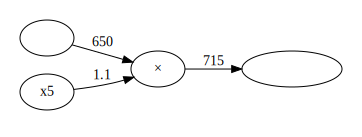

In [28]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="積算ノードと加算ノードをあわせた計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
    with main.subgraph(name="cluster_z") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z1","＋")
    with main.subgraph(name="cluster_a") as a:
        a.attr(label="")
        a.attr(color="white")
        a.node("a1","×")
    with main.subgraph(name="cluster_out") as out:
        out.attr(label="")
        out.attr(color="white")
        out.node("out1","金額（出力）")
    dot.edge("z1", "a1", label="650")
    dot.edge("x5", "a1", label="1.1")
    dot.edge("a1", "out1", label="715")
#print(dot)
dot

一部のみを抜粋しても計算が可能

### 逆伝搬の例

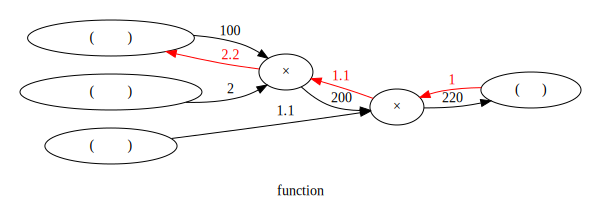

In [2]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="ノードをfunctionとした計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","りんご単価(スカラ)")
        x.node("x2","リンゴの個数(スカラ)")
        x.node("x3","消費税(スカラ)")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y1","×")
    with main.subgraph(name="cluster_y") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z1","×")    
    with main.subgraph(name="cluster_y") as out:
        out.attr(label="")
        out.attr(color="white")
        out.node("out1","金額(出力)")
    #Forward propagation
    dot.edge("x1", "y1", label="100")
    dot.edge("x2", "y1", label="2")
    dot.edge("x3", "z1", label="1.1")
    dot.edge("y1", "z1", label="200")
    dot.edge("z1", "out1", label="220")
    
    #Back propagation
    dot.edge("out1", "z1", label="1", color="red", fontcolor="red")
    dot.edge("z1", "y1", label="1.1", color="red", fontcolor="red")
    dot.edge("y1", "x1", label="2.2", color="red", fontcolor="red")
    
#print(dot)
dot

りんごが「１円」微動した場合の価格の微動は「2.2円」であることが示されている。

# 連鎖律

## 計算グラフの逆伝搬

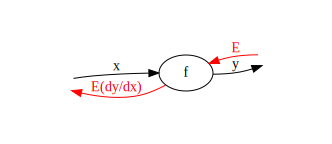

In [1]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="line") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="計算グラフの逆伝搬")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_x") as x:
        x.attr(label="")
        x.attr(color="white")
        x.node("x1","", color="white")
    with main.subgraph(name="cluster_y") as y:
        y.attr(label="")
        y.attr(color="white")
        y.node("y1","f")
    with main.subgraph(name="cluster_y") as z:
        z.attr(label="")
        z.attr(color="white")
        z.node("z1","", color="white")
    dot.edge("x1", "y1", label="x")
    dot.edge("y1", "z1", label="y")
    dot.edge("z1", "y1", label="E", color="red", fontcolor="red")
    dot.edge("y1", "x1", label="E(dy/dx)", color="red", fontcolor="red")
#print(dot)
dot

- $x$: 下流から得たスカラ値
- $y$: $f(x)$
- $E$: 上流から得たスカラ値
- $dy/dx$: 関数fの導関数

## 連鎖律とは

ある関数が合成関数で表すことができる場合、その__合成関数の微分は、合成関数を構成するそれぞれの関数の微分の積によって表すことができる。__これを__連鎖律の原理__と呼ぶ。

### $ y = (x+y)^2 $の微分の例

$ y = (x+y)^2 $は以下のような変数 $z$ と $t$ によって表せる。  
  
式1. $ z = t^2 $  
式2. $ t = x + y $  
  

式1,式2を合成関数と呼ぶ。  

$ y = (x+y)^2 $ の導関数は$ \frac{\partial y}{\partial x} $  
$ z = t^2 $ の導関数は$ \frac{\partial z}{\partial t} $  

であるので、連鎖律によりこの合成関数の導関数は  

$ \frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x} $
となる。  
  
$\partial t$は積算で互いに打ち消し合い、最終的に元の式の導関数に戻ることを確認する。


### 合成関数の微分の計算

$ \frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x} $ を計算する。  
  
- $ \frac{\partial z}{\partial t} = 2t $ (通常の解析微分)
- $ \frac{\partial t}{\partial x} = 1$

$t$を展開すると $ 2 (x + y) $。この結果は$ y = (x+y)^2 $ の導関数: $ \frac{\partial y}{\partial x} $と一致することを確認する。  

### $ y = (x+y)^2 $を計算グラフで示す

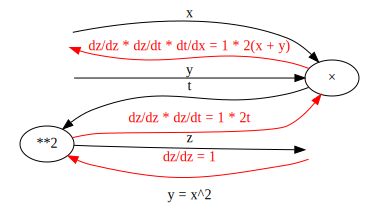

In [10]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(ranksep="1.2")
dot.attr(nodesep=".05")
#dot.attr(margin="1")
#dot.attr(splines="polyline") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="y = x^2の計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.attr(color="white")
        L1.node("L1N1", "", color="white")
        L1.node("L1N2", "", color="white")
    with main.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.attr(color="white")
        L2.node("L2N1","×")
    with main.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.attr(color="white")
        L3.node("L3N1", "**2")
    with main.subgraph(name="cluster_a") as L4:
        L4.attr(label="")
        L4.attr(color="white")
        L4.node("L4N1", "", color="white")
    #Forward Propagation
    dot.edge("L1N1", "L2N1", label="x")
    dot.edge("L1N2", "L2N1", label="y")
    dot.edge("L2N1", "L3N1", label="t")
    dot.edge("L3N1", "L4N1", label="z")
    #Back Propagation
    dot.edge("L4N1", "L3N1", label="dz/dz = 1", color="red", fontcolor="red")
    dot.edge("L3N1", "L2N1", label="dz/dz * dz/dt = 1 * 2t", color="red", fontcolor="red")
    dot.edge("L2N1", "L1N1", label="dz/dz * dz/dt * dt/dx = 1 * 2(x + y)", color="red", fontcolor="red")
    #dot.edge("L2N1", "L1N2", label="", color="red", fontcolor="red")
#print(dot)
dot

## 加算ノードの逆伝搬

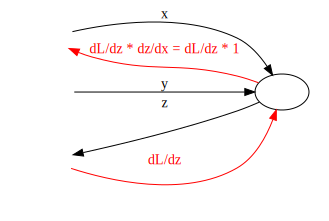

In [34]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="加算ノード計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.attr(color="white")
        L1.node("L1N1", "", color="white")
        L1.node("L1N2", "", color="white")
    with main.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.attr(color="white")
        L2.node("L2N1","＋")
    with main.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.attr(color="white")
        L3.node("L3N1", "", color="white")
    #Forward Propagation
    dot.edge("L1N1", "L2N1", label="x")
    dot.edge("L1N2", "L2N1", label="y")
    dot.edge("L2N1", "L3N1", label="z")
    #Back Propagation
    dot.edge("L3N1", "L2N1", label="dL/dz", color="red", fontcolor="red")
    dot.edge("L2N1", "L1N1", label="dL/dz * dz/dx = dL/dz * 1", color="red", fontcolor="red")
#print(dot)
dot

- $z = x + y$  
    - $ \frac{\partial z}{\partial x} = 1$
    - $ \frac{\partial z}{\partial y} = 1$
  
よって、加算ノードの微分逆伝搬は上流からの伝搬$L$をそのまま下流に伝達させるのみ。

## 乗算ノードの逆伝搬

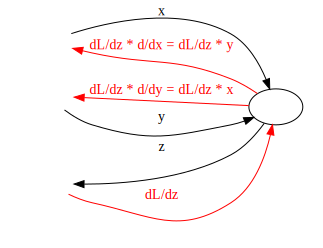

In [7]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="乗算ノード計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.attr(color="white")
        L1.node("L1N1", "", color="white")
        L1.node("L1N2", "", color="white")
    with main.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.attr(color="white")
        L2.node("L2N1","＊")
    with main.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.attr(color="white")
        L3.node("L3N1", "", color="white")
    #Forward Propagation
    dot.edge("L1N1", "L2N1", label="x")
    dot.edge("L1N2", "L2N1", label="y")
    dot.edge("L2N1", "L3N1", label="z")
    #Back Propagation
    dot.edge("L3N1", "L2N1", label="dL/dz", color="red", fontcolor="red")
    dot.edge("L2N1", "L1N1", label="dL/dz * d/dx = dL/dz * y", color="red", fontcolor="red")
    dot.edge("L2N1", "L1N2", label="dL/dz * d/dy = dL/dz * x", color="red", fontcolor="red")
#print(dot)
dot

- $z = xy$  
    - $ \frac{\partial z}{\partial x} = y$
    - $ \frac{\partial z}{\partial y} = x$
よって、乗算ノードの微分逆伝搬は上流からの伝搬$L$を入力変数で微分して下流に伝達させる。（伝搬方向がひっくり返る）

## あらゆる式は2入力1出力の計算グラフに直すことが出来る

### 例
$f(x,y) = 2x + 3y + 4z$

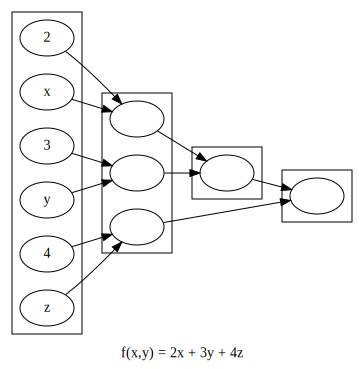

In [11]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="f(x,y) = 2x + 3y + 4zの計算グラフ")
with dot.subgraph(name="main") as main:
    with main.subgraph(name="cluster_L1") as L1:
        L1.attr(label="")
        L1.node("L1N1", "2")
        L1.node("L1N2", "x")
        L1.node("L1N3", "3")
        L1.node("L1N4", "y")
        L1.node("L1N5", "4")
        L1.node("L1N6", "z")
    with main.subgraph(name="cluster_L2") as L2:
        L2.attr(label="")
        L2.node("L2N1","＊")
        L2.node("L2N2","＊")
        L2.node("L2N3","＊")
    with main.subgraph(name="cluster_L3") as L3:
        L3.attr(label="")
        L3.node("L3N1", "＋")
    with main.subgraph(name="cluster_L4") as L4:
        L4.attr(label="")
        L4.node("L4N1", "＋")
    dot.edge("L1N1", "L2N1", label="")
    dot.edge("L1N2", "L2N1", label="")
    dot.edge("L1N3", "L2N2", label="")
    dot.edge("L1N4", "L2N2", label="")
    dot.edge("L1N5", "L2N3", label="")
    dot.edge("L1N6", "L2N3", label="")
    
    dot.edge("L2N1", "L3N1", label="")
    dot.edge("L2N2", "L3N1", label="")

    dot.edge("L3N1", "L4N1", label="")
    dot.edge("L2N3", "L4N1", label="")

    #print(dot)
dot